In [16]:
from src.data_structures.instance import Instance
from src.solvers.ZeroReductor.DLHEU2 import DHEU
from src.solvers.ZeroReductor.solver import features
from src.data_structures.features import *
import torch
from torch import nn
import os
from pathlib import Path
import sys
import numpy as np
import sys
from matplotlib import pyplot as plt
import pickle
from random import shuffle
torch.set_default_tensor_type(torch.DoubleTensor)

In [17]:
def encode_bool_vec(a):
    indices = a.nonzero()
    a-= 1
    indices.T[0]
    a[indices] = 1
    return a

def decode_bool_vec(a):
    a = a + 1
    return a/2

validation_data_folder = Path("validation_data")
training_data_folder = Path("training_data")

In [18]:
key= lambda x: x.n_items
instances = list(iter(map(Instance.from_file,training_data_folder.iterdir())))
instances.sort(key=key)

evaluation_instances = list(iter(map(Instance.from_file,validation_data_folder.iterdir())))
evaluation_instances.sort(key=key)




In [19]:
heu = DHEU(features)

In [20]:
#Este bloque se ejecuta manualmente tantas veces se necesite
for i in range(10):
    loss = []
    for epoch, instance in enumerate(instances):
        x = heu.gen_x(instance).T
        y = encode_bool_vec(instance.get_feature(IsInOptSol())).view(-1,1)
        if len(y) == 0: #Si la instancia no tiene solucion, no se usa :D (Las instancias mas pequeñas tienen ese riesgo)
            continue
        heu.optimizer.zero_grad()
        total_loss = 0
        y_pred = heu.net(x)
        batch_loss = heu.criterion(y_pred,y)
        batch_loss.backward()
        heu.optimizer.step()
        total_loss += batch_loss.item()
        loss.append((total_loss/2,instance))
        sys.stdout.write(f'\rEpoch {epoch},Presicion {1-(total_loss/2)} {str(instance)}')
        sys.stdout.flush()

Epoch 2497,Presicion 0.9500105882595165 Instance(2500,50,#8751415577281)7)

In [21]:
#heu.save(Path("/home/mixto/repositories/PRKP/src/solvers/ZeroReductor/models/DHEUV2.model"))
heu.load(Path("/home/mixto/repositories/PRKP/src/solvers/ZeroReductor/models/DHEUV2.model"))

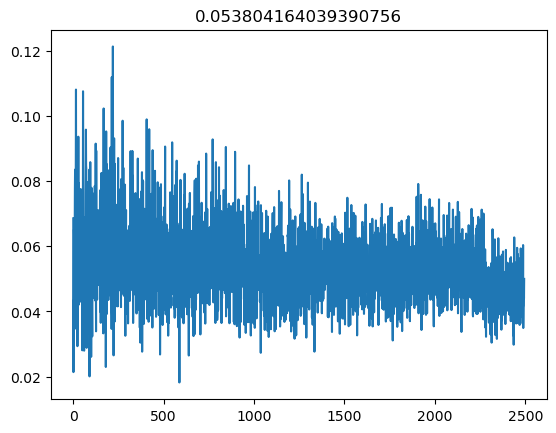

In [22]:
from matplotlib import pyplot as plt
plt.plot([i for i in range(len(loss))],[i[0] for i in loss])
plt.title(np.average([i[0] for i in loss]))
plt.savefig("network_loss.png")

In [23]:
for tupla in loss[:2000]:
    print(tupla[0],str(tupla[1]))

0.06857363900300335 Instance(100,23,#8751551447761)
0.021391430659331433 Instance(100,40,#8751549753153)
0.043376622896544606 Instance(100,62,#8751541094605)
0.04102755287077958 Instance(100,88,#8751539309565)
0.06513477704938742 Instance(100,26,#8751538822917)
0.05913510296503301 Instance(100,97,#8751538848845)
0.047211517812713585 Instance(100,82,#8751528061949)
0.050404406327405386 Instance(100,79,#8751527309301)
0.06597139442340634 Instance(100,90,#8751526489085)
0.07719664727918632 Instance(100,94,#8751525941245)
0.08351536805800444 Instance(100,90,#8751525154801)
0.05859260316825739 Instance(100,65,#8751524428781)
0.036803291968651015 Instance(100,90,#8751523578877)
0.058758299725104685 Instance(100,80,#8751522788349)
0.08714406711304948 Instance(100,87,#8751522166781)
0.10807301139424971 Instance(100,70,#8751521373181)
0.07842184453507112 Instance(100,54,#8751520652269)
0.03462072917103806 Instance(100,71,#8751519801301)
0.037870003978786086 Instance(100,81,#8751558154285)
0.090

Presicion 9015.461%
STD 189.116%


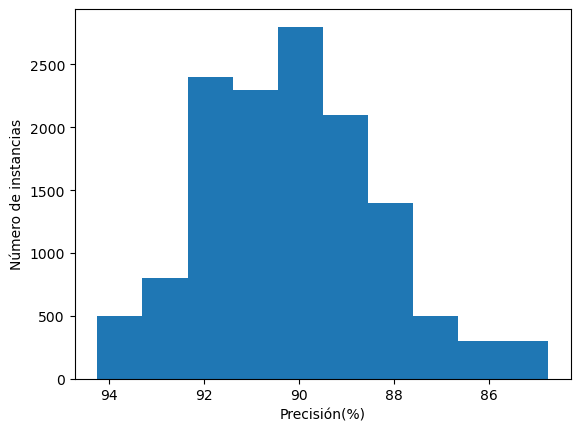

In [26]:
heu = DHEU(features)
heu.load(Path("/home/mixto/repositories/PRKP/src/solvers/ZeroReductor/models/DHEUV2.model"))
losses = []
with torch.no_grad():
    for instance in evaluation_instances:
        x = heu.gen_x(instance).T
        y = encode_bool_vec(instance.get_feature(IsInOptSol())).view(-1,1)
        if len(y) == 0:
            continue
        y_pred = heu.net(x)
        eval_loss = heu.criterion(y,y_pred)
        losses.append((1-eval_loss)*100)
precision = (np.average(losses))*100
desviacion_estandar = (np.std(losses))*100
print(f"Presicion {np.round(precision,3)}%")
print(f"STD {np.round(desviacion_estandar,3)}%")
plt.hist(losses*100)
plt.gca().invert_xaxis()  # Invierte el eje x

plt.ylabel("Número de instancias")
plt.xlabel("Precisión(%)")
plt.savefig("network_precision.png")

In [25]:
heu = DHEU(features)
heu.load(Path("/home/mixto/repositories/PRKP/src/solvers/ZeroReductor/models/DHEUV2.model"))
preds = []
big_instances = [Instance.generate(20000,10000) for k in range(1)]
with torch.no_grad():
    for instance in big_instances:
        x = heu.gen_x(instance).T
        y = encode_bool_vec(instance.get_feature(IsInOptSol())).view(-1,1)
        if len(y) == 0:
            continue
        y_pred = heu.net(x)
        y_pred = y_pred.view(-1)
        for pred in y_pred:
            preds.append(pred)

precision = (np.average(preds))*100
desviacion_estandar = (np.std(preds))*100
print(f"Presicion {np.round(precision,3)}%")
print(f"STD {np.round(desviacion_estandar,3)}%")
plt.hist(preds,bins=100)
plt.gca().invert_xaxis()  # Invierte el eje x

plt.ylabel("Número de instancias")
plt.xlabel("Precisión(%)")
plt.savefig("network_precision.png")

KeyboardInterrupt: 

(array([825., 397., 375., 390., 235.,  79.,  74.,  57.,  65.,   0.,   0.,
         0.,   0.,   0.,   1.]), array([ 100.,  260.,  420.,  580.,  740.,  900., 1060., 1220., 1380.,
       1540., 1700., 1860., 2020., 2180., 2340., 2500.]), <BarContainer object of 15 artists>)


(100.0, 1500.0)

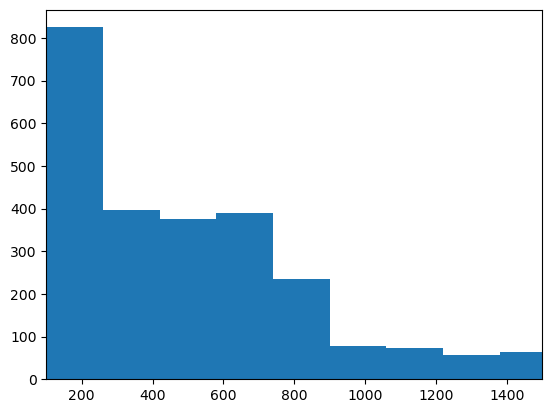

In [ ]:

a = plt.hist([instance.n_items for instance in instances],bins=15)
print(a)
plt.xlim(100,1500)